# Grouping and Clustering of immune cells

## Finding the coefficients through Linear Regression

In [1]:
import pandas as pd

In [2]:
cetux = pd.read_csv("../raw_data/cetux.csv")
cetux.head()

,pat_nr,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,sex,age,skin_rash
0,9,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,...,0.071104,0.000000,0.0,0.188876,0.000000,0.074924,0.004,1.0,61.0,1.0
1,10,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,...,0.000000,0.009239,0.0,0.134230,0.000000,0.070198,0.024,1.0,74.0,1.0
2,12,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,...,0.024802,0.000000,0.0,0.086495,0.032828,0.051155,0.002,1.0,73.0,1.0
3,15,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,...,0.000000,0.000000,0.0,0.081489,0.000000,0.004522,0.034,1.0,68.0,1.0
4,16,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,...,0.079572,0.010232,0.0,0.045427,0.000000,0.095906,0.022,1.0,42.0,1.0


In [86]:
cetux.columns

Index(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value', 'sex',
       'age', 'skin_rash', 'group_1', 'group_2', 'group_3', 'group_4',
       'group_5', 'group_6', 'group_7', 'group_8', 'group_9', 'group_10',
       'group_11'],
      dtype='object')

In [3]:
X=cetux.drop(columns=["pat_nr","P-value","sex","age","skin_rash"])
y=cetux["skin_rash"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(class_weight='balanced')

cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.003996,0.004199,0.588235,0.625000,0.555556,0.588235
1,0.005669,0.010424,0.588235,0.500000,0.571429,0.533333
2,0.008454,0.009290,0.294118,0.500000,0.333333,0.400000
3,0.007562,0.008828,0.562500,0.500000,0.571429,0.533333
4,0.007361,0.008935,0.562500,0.500000,0.571429,0.533333
5,0.005999,0.005158,0.437500,0.375000,0.428571,0.400000
6,0.003811,0.004284,0.437500,0.625000,0.454545,0.526316
7,0.003587,0.003660,0.312500,0.428571,0.300000,0.352941
8,0.003277,0.003862,0.625000,0.428571,0.600000,0.500000
9,0.003508,0.003697,0.562500,0.571429,0.500000,0.533333


In [6]:
cv_results['test_accuracy'].mean()

0.4970588235294118

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


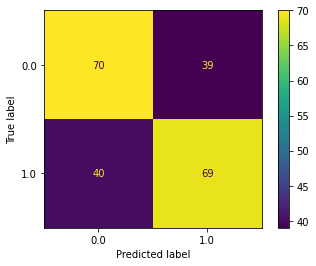

In [7]:
from sklearn.metrics import plot_confusion_matrix

model=model.fit(X,y)
plot_confusion_matrix(model,X,y)

## Sorted by Coefficients

In [8]:
coef=model.coef_[0]
dicc=dict()
for i in range(len(list(X))):
    dicc[list(X)[i]]=coef[i]
dicc

dic=dict(sorted(dicc.items(), key=lambda item: item[1]))
dic

{'Macrophages M2': -1.0281205932253696,
 'Mast cells resting': -0.27996281030719167,
 'Macrophages M1': -0.25265729897547745,
 'T cells CD4 memory activated': -0.24604071981271972,
 'T cells CD8': -0.11293915693691195,
 'T cells CD4 memory resting': -0.0986085243857368,
 'NK cells activated': -0.09794740247420039,
 'Monocytes': -0.08440210927735183,
 'T cells regulatory (Tregs)': -0.048966732359054035,
 'Eosinophils': -0.000963835020026385,
 'T cells CD4 naive': -0.0005777683753863841,
 'T cells gamma delta': 0.0025638234104555803,
 'NK cells resting': 0.014608800164683135,
 'B cells naive': 0.02657539116906823,
 'Dendritic cells activated': 0.056652351355285596,
 'Mast cells activated': 0.08845727998754241,
 'B cells memory': 0.10038235693175533,
 'Dendritic cells resting': 0.14204039503716995,
 'T cells follicular helper': 0.2768019895396375,
 'Macrophages M0': 0.4959045041303684,
 'Neutrophils': 0.5066387373395576,
 'Plasma cells': 0.5410445447030392}

Positively correlated:
- 'T cells follicular helper': 0.2768019895396375
- 'Macrophages M0': 0.4959045041303684
- 'Neutrophils': 0.5066387373395576
- 'Plasma cells': 0.5410445447030392
 
Negatively correlated: 
- 'Macrophages M2': -1.0281205932253696
- 'Mast cells resting': -0.27996281030719167
- 'Macrophages M1': -0.25265729897547745
- 'T cells CD4 memory activated': -0.24604071981271972

## Linear Regression new p-values

In [9]:
cetux_new_p = cetux[cetux['P-value'] <= 0.05]

In [10]:
cetux_new_p.shape

(163, 27)

In [11]:
X=cetux_new_p.drop(columns=["pat_nr","P-value","sex","age","skin_rash"])
y=cetux_new_p["skin_rash"]

In [12]:
X_train_new_p, X_test_new_p, y_train_new_p, y_test_new_p = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6)

In [13]:
model_new = LogisticRegression(class_weight='balanced')

cv_results = cross_validate(model_new, X_train_new_p, y_train_new_p, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.007210,0.005535,0.538462,0.333333,0.500000,0.400000
1,0.004234,0.005939,0.769231,0.666667,0.800000,0.727273
2,0.005666,0.004683,0.416667,0.400000,0.333333,0.363636
3,0.003891,0.004470,0.750000,0.400000,1.000000,0.571429
4,0.004036,0.005014,0.500000,0.600000,0.428571,0.500000
5,0.003823,0.004636,0.666667,0.666667,0.666667,0.666667
6,0.003870,0.004287,0.583333,0.333333,0.666667,0.444444
7,0.003830,0.004666,0.500000,0.333333,0.500000,0.400000
8,0.003704,0.004328,0.583333,0.666667,0.571429,0.615385
9,0.003775,0.004226,0.666667,0.666667,0.666667,0.666667


In [14]:
cv_results['test_accuracy'].mean()

0.5974358974358974

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


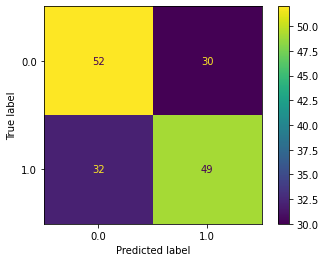

In [15]:
model=model_new.fit(X,y)
plot_confusion_matrix(model,X,y)

In [16]:
coef=model_new.coef_[0]
dicc=dict()
for i in range(len(list(X))):
    dicc[list(X)[i]]=coef[i]
dicc

dic=dict(sorted(dicc.items(), key=lambda item: item[1]))
dic

{'Macrophages M2': -0.7802190689926078,
 'T cells CD4 memory activated': -0.3248436219911495,
 'Mast cells resting': -0.2901943111687133,
 'Macrophages M1': -0.28260031212175435,
 'T cells CD4 memory resting': -0.12312289595880294,
 'NK cells activated': -0.07654199521268916,
 'T cells CD8': -0.05794294218869934,
 'NK cells resting': -0.050029133059303996,
 'T cells regulatory (Tregs)': -0.05000791460960443,
 'Monocytes': -0.046737775610988214,
 'T cells CD4 naive': -0.0004892307746690806,
 'Eosinophils': 0.003728926176864529,
 'Dendritic cells resting': 0.04592997079828918,
 'T cells gamma delta': 0.05995540090166914,
 'Dendritic cells activated': 0.06951327767067968,
 'Mast cells activated': 0.09258245304175734,
 'B cells memory': 0.10378583112808439,
 'Macrophages M0': 0.12114801579523894,
 'B cells naive': 0.1855539321245238,
 'T cells follicular helper': 0.3549119214882749,
 'Plasma cells': 0.509581127044486,
 'Neutrophils': 0.5362771461577228}

# Grouping

In [17]:
cetux['group_1'] = cetux['Neutrophils'] + cetux['Plasma cells']

In [18]:
cetux['group_2'] = cetux['T cells follicular helper'] + cetux['B cells naive']

In [19]:
cetux['group_3'] = cetux['Macrophages M0'] + cetux['B cells memory']

In [20]:
cetux['group_4'] = cetux['Dendritic cells activated'] + cetux['Mast cells activated']

In [21]:
cetux['group_5'] = cetux['T cells gamma delta'] + cetux['Dendritic cells resting']

In [22]:
cetux['group_6'] = cetux['Eosinophils'] + cetux['T cells CD4 naive']

In [23]:
cetux['group_7'] = cetux['Monocytes'] + cetux['T cells regulatory (Tregs)']

In [24]:
cetux['group_8'] = cetux['NK cells resting'] + cetux['T cells CD8']

In [25]:
cetux['group_9'] = cetux['NK cells activated'] + cetux['T cells CD4 memory resting']

In [26]:
cetux['group_10'] = cetux['Macrophages M1'] + cetux['Mast cells resting']

In [27]:
cetux['group_11'] = cetux['Macrophages M2'] + cetux['T cells CD4 memory activated']

In [28]:
cetux.columns

Index(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value', 'sex',
       'age', 'skin_rash', 'group_1', 'group_2', 'group_3', 'group_4',
       'group_5', 'group_6', 'group_7', 'group_8', 'group_9', 'group_10',
       'group_11'],
      dtype='object')

In [29]:
cetux_group_2 = cetux.drop(['pat_nr', 'B cells naive', 'B cells memory', 'Plasma cells',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Mast cells resting',
       'Mast cells activated', 'Eosinophils', 'Neutrophils', 'P-value', 'sex',
       'age'], axis = 1)

In [30]:
cetux_group_2.head()

,skin_rash,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11
0,1.0,0.172254,0.069777,0.012340,0.188876,0.165827,0.000000,0.067972,0.072327,0.168887,0.061996,0.019745
1,1.0,0.175237,0.035303,0.000000,0.143469,0.000000,0.000000,0.116392,0.139562,0.249715,0.000000,0.140322
2,1.0,0.169554,0.065798,0.008250,0.086495,0.024802,0.032828,0.069544,0.134629,0.281396,0.121340,0.005364
3,1.0,0.190594,0.010223,0.000000,0.081489,0.000000,0.000000,0.151447,0.250091,0.283032,0.018321,0.014802
4,1.0,0.152203,0.035983,0.025063,0.055659,0.079572,0.000000,0.057663,0.089617,0.336947,0.000000,0.167292


In [31]:
X=cetux_group_2.drop(columns=["skin_rash"])
y=cetux_group_2["skin_rash"]

X_train_group_2, X_test_group_2, y_train_group_2, y_test_group_2 = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 6)

In [32]:
model_3 = LogisticRegression(class_weight='balanced')

cv_results = cross_validate(model_3, X_train_group_2, y_train_group_2, cv=10, scoring=["accuracy","recall","precision","f1"])
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.005052,0.010318,0.529412,0.500000,0.500000,0.500000
1,0.004552,0.004485,0.588235,0.500000,0.571429,0.533333
2,0.005047,0.004339,0.294118,0.500000,0.333333,0.400000
3,0.004164,0.004457,0.500000,0.500000,0.500000,0.500000
4,0.004463,0.004559,0.625000,0.500000,0.666667,0.571429
5,0.004239,0.005681,0.437500,0.500000,0.444444,0.470588
6,0.004378,0.004278,0.562500,0.750000,0.545455,0.631579
7,0.004600,0.004679,0.437500,0.714286,0.416667,0.526316
8,0.003757,0.004378,0.500000,0.285714,0.400000,0.333333
9,0.004107,0.004620,0.687500,0.714286,0.625000,0.666667


In [33]:
cv_results['test_accuracy'].mean()

0.5161764705882353

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


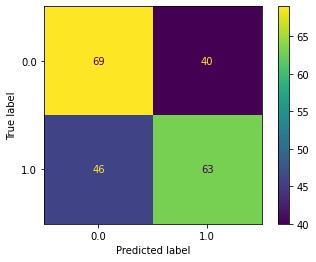

In [34]:
model=model_3.fit(X,y)
plot_confusion_matrix(model,X,y)

In [35]:
coef=model_3.coef_[0]
dicc=dict()
for i in range(len(list(X))):
    dicc[list(X)[i]]=coef[i]
dicc

dic=dict(sorted(dicc.items(), key=lambda item: item[1]))
dic

{'group_11': -1.15969471040149,
 'group_10': -0.47374245691516614,
 'group_9': -0.1648543271227464,
 'group_7': -0.1422208639455422,
 'group_8': -0.08852800188981716,
 'group_6': -0.0016951507007642078,
 'group_4': 0.10641184609291816,
 'group_5': 0.15335225439872405,
 'group_2': 0.29667559849589875,
 'group_3': 0.574399286025755,
 'group_1': 0.8998944887849933}

# Fooling around

In [36]:
cetux_mean= cetux.drop(['pat_nr','age', 'sex', 'P-value', 'group_1', 'group_2', 'group_3', 'group_4',
       'group_5', 'group_6', 'group_7', 'group_8', 'group_9', 'group_10',
       'group_11'], axis=1)

In [37]:
cetux_mean_rash = cetux_mean[cetux_mean.skin_rash == 1.0]

In [38]:
cetux_mean_rash.head(20)

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,skin_rash
0,0.067346,0.000000,0.097330,0.072327,0.0,0.168887,0.000000,0.002431,0.067972,0.094723,...,0.012340,0.061996,0.019745,0.071104,0.000000,0.000000,0.188876,0.000000,0.074924,1.0
1,0.000000,0.000000,0.105039,0.066233,0.0,0.249715,0.074691,0.035303,0.085112,0.000000,...,0.000000,0.000000,0.065631,0.000000,0.009239,0.000000,0.134230,0.000000,0.070198,1.0
2,0.065798,0.000000,0.118399,0.111458,0.0,0.281396,0.000000,0.000000,0.069544,0.000000,...,0.008250,0.121340,0.005364,0.024802,0.000000,0.000000,0.086495,0.032828,0.051155,1.0
3,0.010223,0.000000,0.186072,0.193724,0.0,0.283032,0.000000,0.000000,0.144012,0.000000,...,0.000000,0.018321,0.014802,0.000000,0.000000,0.000000,0.081489,0.000000,0.004522,1.0
4,0.000000,0.013582,0.056297,0.080645,0.0,0.336947,0.000000,0.035983,0.057663,0.000000,...,0.011481,0.000000,0.167292,0.079572,0.010232,0.000000,0.045427,0.000000,0.095906,1.0
6,0.044448,0.000000,0.100616,0.031390,0.0,0.221925,0.000000,0.022205,0.119496,0.000000,...,0.000000,0.010504,0.065103,0.006880,0.005117,0.000000,0.153702,0.000000,0.126021,1.0
7,0.000000,0.002193,0.179680,0.107094,0.0,0.207464,0.000000,0.043545,0.127027,0.000000,...,0.066872,0.029349,0.015888,0.011273,0.000000,0.000000,0.145572,0.000000,0.064043,1.0
11,0.000000,0.070331,0.109562,0.105362,0.0,0.230482,0.000000,0.000000,0.096231,0.000000,...,0.033768,0.016310,0.050888,0.040150,0.001579,0.149964,0.000000,0.000000,0.020918,1.0
12,0.076637,0.000000,0.097353,0.047994,0.0,0.177568,0.000000,0.016733,0.018611,0.000000,...,0.044782,0.000000,0.129692,0.000000,0.051349,0.000000,0.057489,0.000000,0.218340,1.0
13,0.039438,0.000000,0.000000,0.092406,0.0,0.242658,0.007085,0.041535,0.040865,0.000000,...,0.000000,0.006931,0.065494,0.193770,0.052069,0.055036,0.034499,0.000000,0.061941,1.0


In [39]:
mean_list_rash=[]
for i in range(1, 23):
    mean = cetux_mean_rash.iloc[:,i].mean()
    mean_list_rash.append(mean)

In [40]:
mean_list_rash

[0.006651688690477799,
 0.11772601259313098,
 0.09784732841307654,
 9.018773637010825e-05,
 0.23292678700219527,
 0.01361627893333169,
 0.02927443479715968,
 0.05282953887958629,
 0.0011361768860742413,
 0.03831653810087297,
 0.006321471733668835,
 0.012284231518735369,
 0.03066750667753848,
 0.03016151275326321,
 0.09490777461573001,
 0.020152164424732482,
 0.006711084259930975,
 0.031169689341260704,
 0.06944925807167109,
 0.000301178236991889,
 0.07318067968738932,
 1.0]

In [41]:
cetux_mean_non_rash = cetux_mean[cetux_mean.skin_rash == 0.0]

In [42]:
mean_list_non_rash=[]
for i in range(1, 23):
    mean = cetux_mean_non_rash.iloc[:,i].mean()
    mean_list_non_rash.append(mean)

In [43]:
mean_list_non_rash

[0.004737770937295901,
 0.10540900228768921,
 0.10033975504964712,
 9.147115117020184e-05,
 0.2360836339290048,
 0.018414385306387827,
 0.024103998937488498,
 0.05359705048123627,
 0.0010581477238450366,
 0.03699610315723016,
 0.008491783862701923,
 0.013845070579628912,
 0.020111002345583235,
 0.03556575966207537,
 0.11789763194781405,
 0.01788883118887484,
 0.005567799075184304,
 0.03804187763257598,
 0.06576252304216001,
 0.00031452182672388077,
 0.06170665780866467,
 0.0]

In [44]:
mean_list_non_rash = pd.DataFrame(mean_list_non_rash)

In [45]:
mean_list_rash = pd.DataFrame(mean_list_rash)

In [46]:
mean_list_non_rash - mean_list_rash

,0
0,-0.001914
1,-0.012317
2,0.002492
3,0.000001
4,0.003157
5,0.004798
6,-0.005170
7,0.000768
8,-0.000078
9,-0.001320


## Grouping and Clustering

### Grouping Top 6

#### Grouping by 2

In [47]:
cetux_ext_coef_6 = cetux.drop(['pat_nr', 'B cells naive', 'B cells memory',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells CD4 memory activated', 'T cells follicular helper',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes',
       'Dendritic cells resting',
       'Dendritic cells activated',
       'Mast cells activated', 'Eosinophils', 'P-value', 'sex',
       'age', 'skin_rash', 'group_1', 'group_2', 'group_3', 'group_4',
       'group_5', 'group_6', 'group_7', 'group_8', 'group_9', 'group_10',
       'group_11'], axis = 1)

In [48]:
cetux_ext_coef_6.head()

,Plasma cells,Macrophages M0,Macrophages M1,Macrophages M2,Mast cells resting,Neutrophils
0,0.097330,0.012340,0.061996,0.019745,0.0,0.074924
1,0.105039,0.000000,0.000000,0.065631,0.0,0.070198
2,0.118399,0.008250,0.121340,0.005364,0.0,0.051155
3,0.186072,0.000000,0.018321,0.014802,0.0,0.004522
4,0.056297,0.011481,0.000000,0.167292,0.0,0.095906


In [49]:
from itertools import combinations

comb = combinations([0, 1, 2, 3, 4, 5], 2)

In [50]:
import numpy as np

new_6 = pd.DataFrame()
for i, j in list(comb):
    new_6[f'combi{i}{j}'] = cetux_ext_coef_6.iloc[:,i] + cetux_ext_coef_6.iloc[:, j]

In [51]:
new_6.head()

,combi01,combi02,combi03,combi04,combi05,combi12,combi13,combi14,combi15,combi23,combi24,combi25,combi34,combi35,combi45
0,0.109669,0.159326,0.117074,0.097330,0.172254,0.074336,0.032085,0.012340,0.087264,0.081741,0.061996,0.136920,0.019745,0.094669,0.074924
1,0.105039,0.105039,0.170670,0.105039,0.175237,0.000000,0.065631,0.000000,0.070198,0.065631,0.000000,0.070198,0.065631,0.135829,0.070198
2,0.126650,0.239739,0.123764,0.118399,0.169554,0.129590,0.013614,0.008250,0.059405,0.126704,0.121340,0.172494,0.005364,0.056519,0.051155
3,0.186072,0.204393,0.200874,0.186072,0.190594,0.018321,0.014802,0.000000,0.004522,0.033123,0.018321,0.022843,0.014802,0.019325,0.004522
4,0.067779,0.056297,0.223589,0.056297,0.152203,0.011481,0.178773,0.011481,0.107387,0.167292,0.000000,0.095906,0.167292,0.263198,0.095906


In [52]:
from sklearn.cluster import KMeans

km_cetux_combi = KMeans(n_clusters=2)
km_cetux_combi.fit(new_6)

KMeans(n_clusters=2)

In [53]:
km_cetux_combi.cluster_centers_

array([[0.11985245, 0.13173361, 0.18346372, 0.10744244, 0.1480863 ,
        0.05699777, 0.10872787, 0.03270659, 0.07335045, 0.12060903,
        0.04458775, 0.08523161, 0.09631785, 0.13696172, 0.06094044],
       [0.15790081, 0.15997914, 0.26022306, 0.19359883, 0.21687837,
        0.05978978, 0.1600337 , 0.09340947, 0.11668901, 0.16211202,
        0.09548779, 0.11876734, 0.19573171, 0.21901126, 0.15238702]])

In [54]:
new_6['cluster_pred'] = km_cetux_combi.predict(new_6)
new_6['skin_rash'] = cetux['skin_rash']
new_6['cluster_pred'] = new_6['cluster_pred'].astype('float64')
new_6.head(100)

,combi01,combi02,combi03,combi04,combi05,combi12,combi13,combi14,combi15,combi23,combi24,combi25,combi34,combi35,combi45,cluster_pred,skin_rash
0,0.109669,0.159326,0.117074,0.097330,0.172254,0.074336,0.032085,0.012340,0.087264,0.081741,0.061996,0.136920,0.019745,0.094669,0.074924,0.0,1.0
1,0.105039,0.105039,0.170670,0.105039,0.175237,0.000000,0.065631,0.000000,0.070198,0.065631,0.000000,0.070198,0.065631,0.135829,0.070198,0.0,1.0
2,0.126650,0.239739,0.123764,0.118399,0.169554,0.129590,0.013614,0.008250,0.059405,0.126704,0.121340,0.172494,0.005364,0.056519,0.051155,0.0,1.0
3,0.186072,0.204393,0.200874,0.186072,0.190594,0.018321,0.014802,0.000000,0.004522,0.033123,0.018321,0.022843,0.014802,0.019325,0.004522,0.0,1.0
4,0.067779,0.056297,0.223589,0.056297,0.152203,0.011481,0.178773,0.011481,0.107387,0.167292,0.000000,0.095906,0.167292,0.263198,0.095906,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.201381,0.219803,0.280557,0.199889,0.220150,0.021405,0.082159,0.001491,0.021752,0.100581,0.019913,0.040174,0.080667,0.100928,0.020261,0.0,1.0
96,0.088837,0.153655,0.214616,0.122340,0.143996,0.065174,0.126135,0.033859,0.055516,0.190953,0.098677,0.120333,0.159638,0.181294,0.089018,0.0,0.0
97,0.093333,0.186915,0.172245,0.148280,0.250329,0.093581,0.078912,0.054947,0.156996,0.172493,0.148528,0.250577,0.133859,0.235908,0.211943,1.0,0.0
98,0.269295,0.141494,0.282089,0.141494,0.141494,0.127801,0.268396,0.127801,0.127801,0.140595,0.000000,0.000000,0.140595,0.140595,0.000000,0.0,1.0


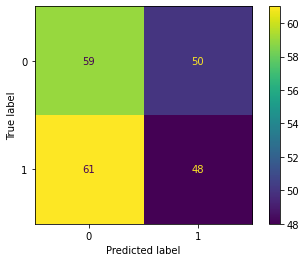

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(new_6['skin_rash'], new_6['cluster_pred'])

ConfusionMatrixDisplay(cm).plot()

### Grouping Top 8

#### Grouping by 2

In [56]:
cetux_ext_coef_8 = cetux.drop(['pat_nr', 'B cells memory', 'B cells naive',
       'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting',
       'T cells regulatory (Tregs)', 'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes',
       'Dendritic cells resting',
       'Dendritic cells activated',
       'Mast cells activated', 'Eosinophils', 'P-value', 'sex',
       'age', 'skin_rash', 'group_1', 'group_2', 'group_3', 'group_4',
       'group_5', 'group_6', 'group_7', 'group_8', 'group_9', 'group_10',
       'group_11'], axis = 1)

In [58]:
comb_2 = combinations([0, 1, 2, 3, 4, 5, 6, 7], 2)

new_8 = pd.DataFrame()
for i, j in list(comb_2):
    new_8[f'combi{i}{j}'] = cetux_ext_coef_8.iloc[:,i] + cetux_ext_coef_8.iloc[:, j]

In [59]:
km_cetux_combi_2 = KMeans(n_clusters=2)
km_cetux_combi_2.fit(new_8)

KMeans(n_clusters=2)

In [60]:
new_8['cluster_pred'] = km_cetux_combi_2.predict(new_8)
new_8['skin_rash'] = cetux['skin_rash']
new_8['cluster_pred'] = new_8['cluster_pred'].astype('float64')

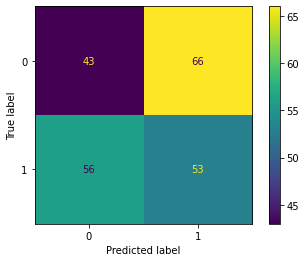

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_2 = confusion_matrix(new_8['skin_rash'], new_8['cluster_pred'])

ConfusionMatrixDisplay(cm_2).plot()

In [62]:
true_ratio_2 = (cm_2[0, 0] + cm_2[1,1])/218
true_ratio_2

0.44036697247706424

#### Grouping by 3

In [63]:
comb_3 = combinations(range(8), 3)

new_8_3 = pd.DataFrame()
for i, j, k in list(comb_3):
    new_8_3[f'combi{i}{j}{k}'] = cetux_ext_coef_8.iloc[:,i] + cetux_ext_coef_8.iloc[:, j] + cetux_ext_coef_8.iloc[:,k]

In [64]:
km_cetux_combi_3 = KMeans(n_clusters=2)
km_cetux_combi_3.fit(new_8_3)

KMeans(n_clusters=2)

In [84]:
new_8_3['cluster_pred'] = km_cetux_combi_3.predict(new_8_3)
new_8_3['skin_rash'] = cetux['skin_rash']
new_8_3['cluster_pred'] = new_8_3['cluster_pred'].astype('float64')

/home/henry/.pyenv/versions/3.8.12/envs/health/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cluster_pred
- skin_rash
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 58 features, but KMeans is expecting 56 features as input.

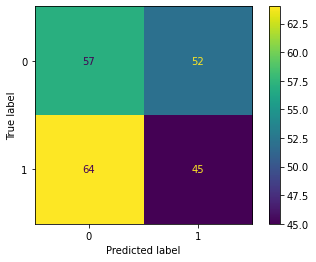

In [66]:
cm_3 = confusion_matrix(new_8_3['skin_rash'], new_8_3['cluster_pred'])

ConfusionMatrixDisplay(cm_3).plot()

In [67]:
true_ratio_3 = (cm_3[0, 0] + cm_3[1,1])/218
true_ratio_3

0.46788990825688076

#### Grouping by 4 

In [68]:
comb_4 = combinations(range(8), 4)

new_8_4 = pd.DataFrame()
for i, j, k, m in list(comb_4):
    new_8_4[f'combi{i}{j}{k}{m}'] = cetux_ext_coef_8.iloc[:,i] + cetux_ext_coef_8.iloc[:, j] + cetux_ext_coef_8.iloc[:,k] + cetux_ext_coef_8.iloc[:,m]

In [69]:
km_cetux_combi_4 = KMeans(n_clusters=2)
km_cetux_combi_4.fit(new_8_4)

KMeans(n_clusters=2)

In [70]:
new_8_4['cluster_pred'] = km_cetux_combi_4.predict(new_8_4)
new_8_4['skin_rash'] = cetux['skin_rash']
new_8_4['cluster_pred'] = new_8_4['cluster_pred'].astype('float64')

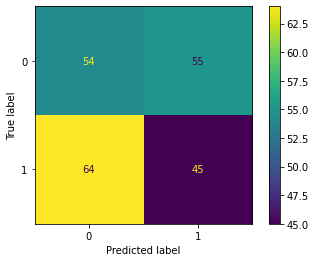

In [71]:
cm_4 = confusion_matrix(new_8_4['skin_rash'], new_8_4['cluster_pred'])

ConfusionMatrixDisplay(cm_4).plot()

In [72]:
true_ratio_4 = (cm_4[0, 0] + cm_4[1,1])/218
true_ratio_4

0.4541284403669725

#### Group by 5

In [73]:
comb_5 = combinations(range(8), 5)

new_8_5 = pd.DataFrame()
for i, j, k, m, n in list(comb_5):
    new_8_5[f'combi{i}{j}{k}{m}{n}'] = cetux_ext_coef_8.iloc[:,i] + cetux_ext_coef_8.iloc[:, j] + cetux_ext_coef_8.iloc[:,k] + cetux_ext_coef_8.iloc[:,m] + cetux_ext_coef_8.iloc[:,n]

In [74]:
km_cetux_combi_5 = KMeans(n_clusters=2)
km_cetux_combi_5.fit(new_8_5)

KMeans(n_clusters=2)

In [75]:
new_8_5['cluster_pred'] = km_cetux_combi_5.predict(new_8_5)
new_8_5['skin_rash'] = cetux['skin_rash']
new_8_5['cluster_pred'] = new_8_5['cluster_pred'].astype('float64')

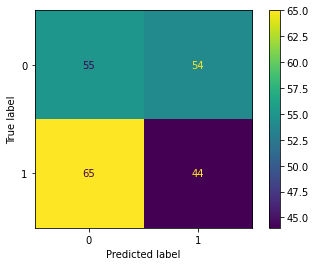

In [76]:
cm_5 = confusion_matrix(new_8_5['skin_rash'], new_8_5['cluster_pred'])

ConfusionMatrixDisplay(cm_5).plot()

In [77]:
true_ratio_5 = (cm_5[0, 0] + cm_5[1,1])/218
true_ratio_5

0.4541284403669725

#### Group by 6

In [78]:
comb_6 = combinations(range(8), 6)

new_8_6 = pd.DataFrame()
for i, j, k, m, n, o in list(comb_6):
    new_8_6[f'combi{i}{j}{k}{m}{n}{o}'] = cetux_ext_coef_8.iloc[:,i] + cetux_ext_coef_8.iloc[:, j] + cetux_ext_coef_8.iloc[:,k] + cetux_ext_coef_8.iloc[:,m] + cetux_ext_coef_8.iloc[:,n] + cetux_ext_coef_8.iloc[:,o]

In [79]:
new_8_6.head()

,combi012345,combi012346,combi012347,combi012356,combi012357,combi012367,combi012456,combi012457,combi012467,combi012567,...,combi023567,combi024567,combi034567,combi123456,combi123457,combi123467,combi123567,combi124567,combi134567,combi234567
0,0.193841,0.174096,0.249021,0.131845,0.206770,0.187025,0.181501,0.256426,0.236681,0.194430,...,0.206770,0.256426,0.266335,0.096512,0.171436,0.151691,0.109440,0.159096,0.169005,0.171436
1,0.280664,0.215033,0.285231,0.280664,0.350862,0.285231,0.280664,0.350862,0.285231,0.350862,...,0.276171,0.276171,0.240868,0.175625,0.245823,0.180192,0.245823,0.245823,0.210520,0.171132
2,0.253353,0.247989,0.299144,0.132014,0.183168,0.177804,0.245103,0.296258,0.290893,0.174918,...,0.183168,0.296258,0.304508,0.134954,0.186108,0.180744,0.064769,0.177858,0.186108,0.186108
3,0.219195,0.204393,0.208915,0.200874,0.205397,0.190594,0.219195,0.223718,0.208915,0.205397,...,0.205397,0.223718,0.223718,0.033123,0.037646,0.022843,0.019325,0.037646,0.037646,0.037646
4,0.271053,0.103761,0.199667,0.271053,0.366959,0.199667,0.259572,0.355478,0.188186,0.355478,...,0.366959,0.355478,0.330976,0.214756,0.310662,0.143370,0.310662,0.299180,0.274679,0.310662


In [80]:
km_cetux_combi_6= KMeans(n_clusters=2)
km_cetux_combi_6.fit(new_8_6)

KMeans(n_clusters=2)

In [81]:
new_8_6['cluster_pred'] = km_cetux_combi_6.predict(new_8_6)
new_8_6['skin_rash'] = cetux['skin_rash']
new_8_6['cluster_pred'] = new_8_6['cluster_pred'].astype('float64')

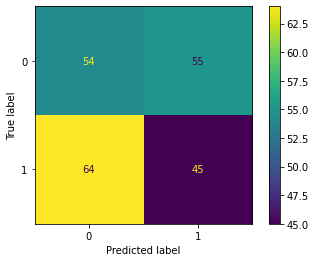

In [82]:
cm_6 = confusion_matrix(new_8_6['skin_rash'], new_8_6['cluster_pred'])

ConfusionMatrixDisplay(cm_6).plot()

In [83]:
true_ratio_6 = (cm_6[0, 0] + cm_6[1,1])/218
true_ratio_6

0.4541284403669725